In [92]:
import pandas as pd
file_path = r"C:\Users\yusuf\OneDrive\Masaüstü\online+retail\Online Retail.xlsx"
data = pd.read_excel(file_path)
pd.set_option('display.max.rows',541910 )
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [93]:
print("Missing values per column:\n", data.isnull().sum())
data.info()

Missing values per column:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [94]:
data_clean = data.dropna(subset=['CustomerID'])
data_clean = data_clean.drop_duplicates()
data_clean = data_clean[(data_clean['Quantity'] > 0) & (data_clean['UnitPrice'] > 0)]
data_clean['InvoiceDate'] = pd.to_datetime(data_clean['InvoiceDate'])
data_clean['TotalPrice'] = data_clean['Quantity'] * data_clean['UnitPrice']
data_clean.info()
data_clean.head()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   TotalPrice   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [95]:
data_clean.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,392692.000000,392692,392692.000000,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865,22.631500
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,4.950000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,12.450000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,180.492832,NaN,22.241836,1713.539549,311.099224


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
print("Quantity Min/Max: ", data_clean['Quantity'].min(), data_clean['Quantity'].max())
print("UnitPrice Min/Max: ", data_clean['UnitPrice'].min(), data_clean['UnitPrice'].max())
print("TotalPrice Min/Max: ", data_clean['TotalPrice'].min(), data_clean['TotalPrice'].max())

Quantity Min/Max:  1 80995
UnitPrice Min/Max:  0.001 8142.75
TotalPrice Min/Max:  0.001 168469.6


In [98]:
q_95 = data_clean['Quantity'].quantile(0.95)
up_95 = data_clean['UnitPrice'].quantile(0.95)
tp_95 = data_clean['TotalPrice'].quantile(0.95)

data_clean['Quantity'] = data_clean['Quantity'].clip(upper=q_95)
data_clean['UnitPrice'] = data_clean['UnitPrice'].clip(upper=up_95)
data_clean['TotalPrice'] = data_clean['TotalPrice'].clip(upper=tp_95)

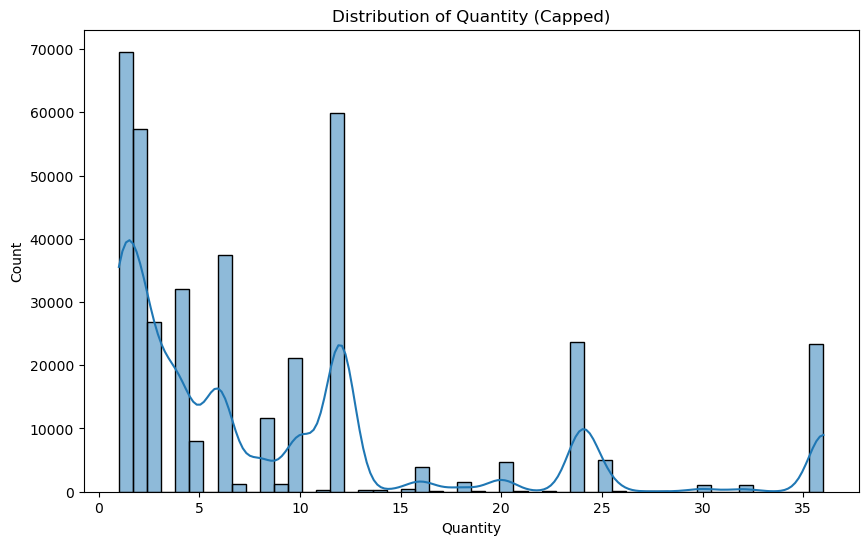

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity (Capped)')
plt.show()

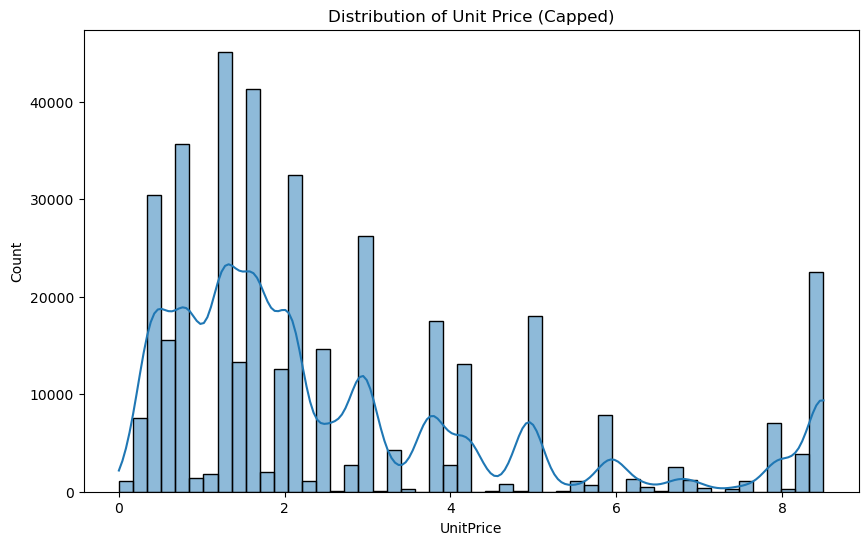

In [100]:
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of Unit Price (Capped)')
plt.show()

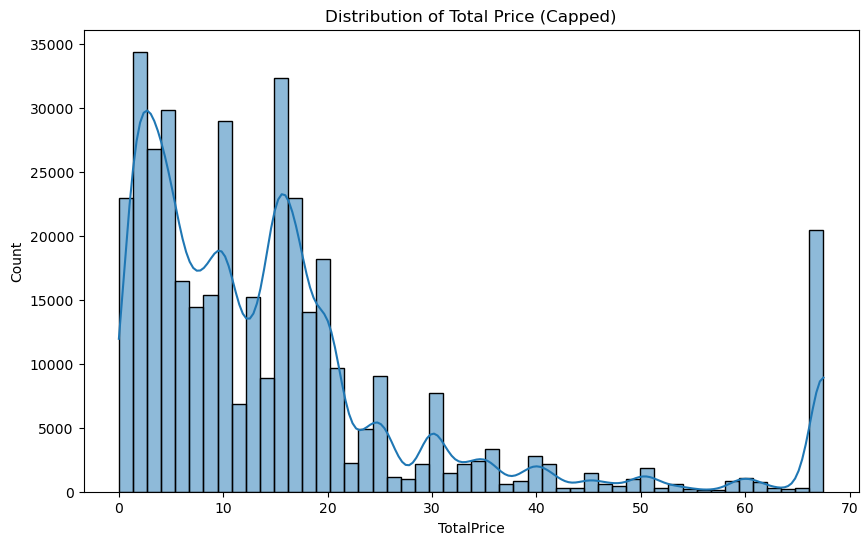

In [101]:
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['TotalPrice'], bins=50, kde=True)
plt.title('Distribution of Total Price (Capped)')
plt.show()

In [102]:
import datetime as dt

reference_date = data_clean['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = data_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  
    'InvoiceNo': 'nunique',  
    'TotalPrice': 'sum'  
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,67.50
1,12347.0,2,7,3989.48
2,12348.0,75,4,1343.24
3,12349.0,19,1,1525.05
4,12350.0,310,1,334.40


In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])


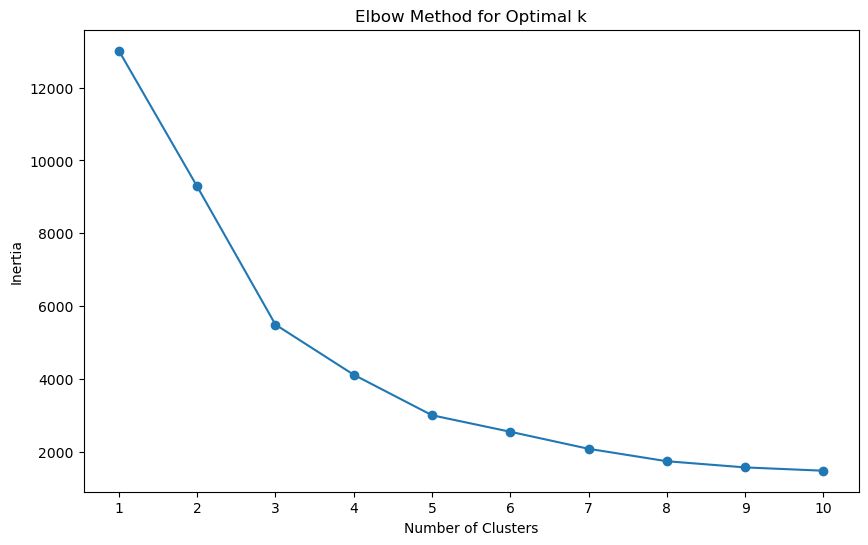

In [104]:
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)  

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(K)
plt.show()

In [105]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled_df)

print(rfm.head())

   CustomerID  Recency  Frequency  Monetary  Cluster
0     12346.0      326          1     67.50        1
1     12347.0        2          7   3989.48        0
2     12348.0       75          4   1343.24        0
3     12349.0       19          1   1525.05        0
4     12350.0      310          1    334.40        1


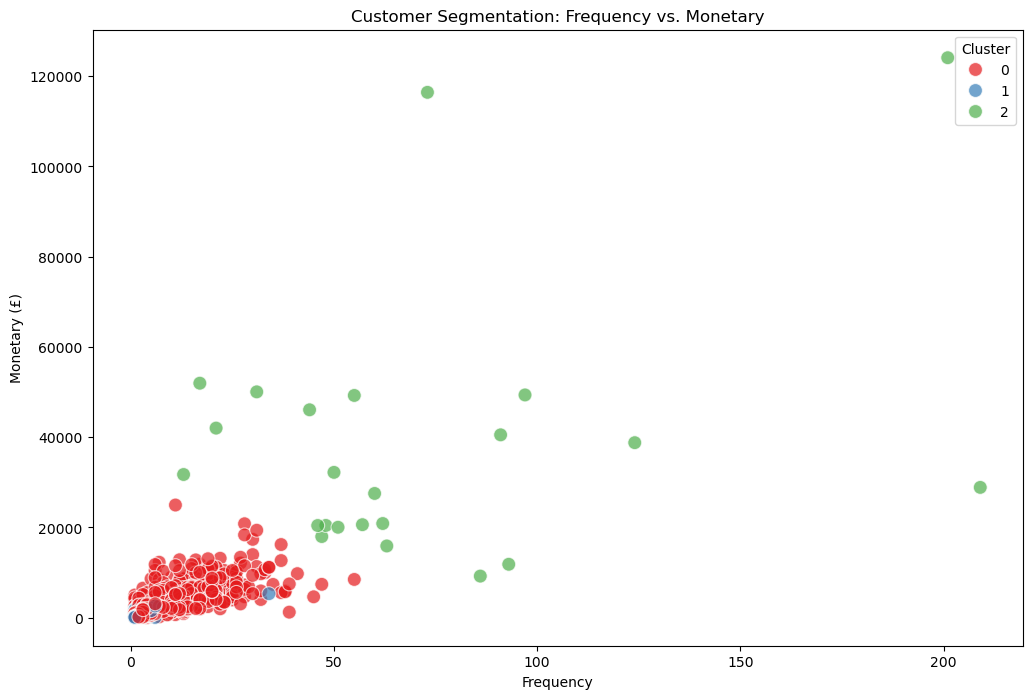

In [106]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='Set1', s=100, alpha=0.7)
plt.title('Customer Segmentation: Frequency vs. Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary (£)')
plt.legend(title='Cluster')
plt.show()

In [107]:
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'  
}).reset_index()

cluster_summary.columns = ['Cluster', 'Avg Recency', 'Avg Frequency', 'Avg Monetary', 'Customer Count']

print(cluster_summary)

   Cluster  Avg Recency  Avg Frequency  Avg Monetary  Customer Count
0        0    41.057436       4.708165   1547.894071            3221
1        1   245.902194       1.579525    413.720595            1094
2        2     6.956522      71.260870  38534.006087              23
